In [26]:
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import csv
import multiprocessing as multiprocessing
from Bio import SeqIO
from Bio import AlignIO
import os
import re
from scipy import stats
from Bio import pairwise2
from Bio.pairwise2 import format_alignment 
from Bio.Seq import Seq 
from multiprocessing import Pool
from FunctionsAnalyzeNanopore import ProcessFile
from FunctionsAnalyzeNanopore import ConcatenateDataFrame
from FunctionsAnalyzeNanopore import CalculateMismatchIndels
from FunctionsAnalyzeNanopore import CountSelectedMismatches
from FunctionsAnalyzeNanopore import CountAllMismatches

# sns.set_style("whitegrid")
sns.set_style("ticks")


num_cores = multiprocessing.cpu_count()
# num_cores = 6
pool_obj = multiprocessing.Pool()

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 16})
plt.rc('legend',fontsize=12) # using a size in points



['MismatchesEachType_g4_01_-.csv', 'MismatchesEachType_cols.csv', 'MismatchesEachType_rows.csv', 'MismatchesEachType_g4_02_evo.csv', 'MismatchesEachType_g4_03_ABE-evo.csv', 'MismatchesEachType_REF_REF.csv', 'MismatchesEachType_Unassigned_Unassigned.csv']
TAATACGACTCACTATAG
TAATA*GA*T*A*TATAG
AGGTTACCCGGTACTGCATAACAATGGAACCCGAACCGTAACTGGGACAGATCGAAAAGCTGGCCTGGTTTCTCGCTGTGTGTGCCGTGTTAATCCGTTTGCCATCAGCGAGATTATTAGTCAATTGCAGTTGCAGCGTTTCGCTTTCGTCCTCGTTTCACTTTCGAGTTAGACTTTATTGCAGCATCTTGAACAATCGTCGCAGTTTGGTAACACGCTGTGCCATACTTTCATTTAGACGGAATCGAGGGACCCTGGACTATAATCGCACAACGAGACCGGGTTGCGAAGTCAGGGCATTCCGCCGATCTAGCCATCGCCATCTTCTGCGGGCGTTTGTTTGTTTGTTTGCTGGGATTAGCCAAGGGCTTGACTTGGAATCCAATCCTGATCCCTAGCCCGATCCCAATCCCAATCCCAATCCCTTGTCCTTTTCATTAGAAAGTCATAAAAACACATAATAATGATGTCGAAGGGATTAGGGG
some error in plotting barplot
some error in plotting barplot
some error in plotting barplot
            Genotype   Time              Group  \
0             BFP-T7  act5C            control   
1     BFP-T7 + evoT7  act5C 

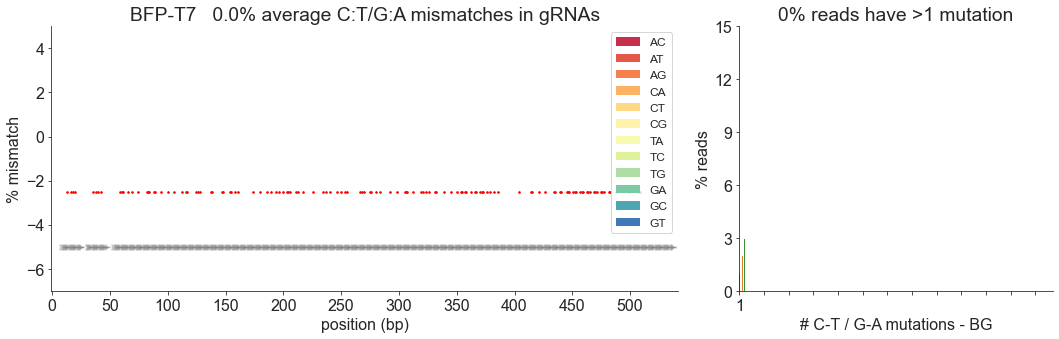

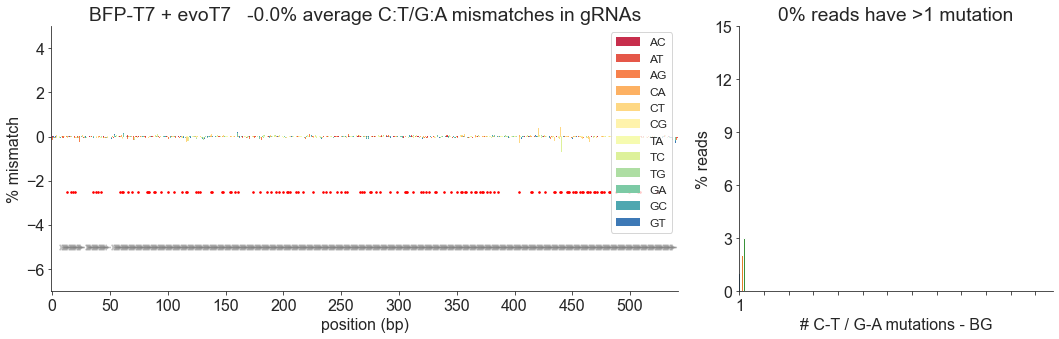

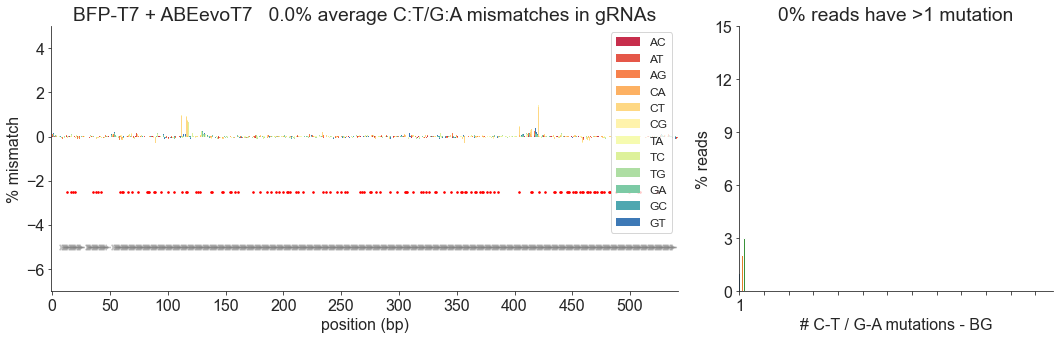

In [27]:
#SET EXPERIMENT TO ANALYZE. save this in some file eventually

GFPseqF = "tgcttcagccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaggtgaagttcgagggcgacaccctggtgaaccgcatcgagctgaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaa"
eveMSE_end_F="tgccaatgcaaattgcgggcgcaatataacccaataatttgaagtaactggcaggagcgaggtatccttcctggttacccggtactgcataacaatggaacccgaaccgtaactgggacagatcgaaaagctggcctggtttctcgctgtgtgtgccgtgttaatccgtttgccatcagcgagattattagtcaattgcagttgcagcgtttcgctttcgtcctcgtttcactttcgagttagactttattgcagcatcttgaacaatcgtcgcagtttggtaacacgctgtgccatactttcatttagacggaatcgagggaccctggactataatcgcacaacgagaccgggttgcgaagtcagggcattccgccgatctagccatcgccatcttctgcgggcgtttgtttgtttgtttgctgggattagccaagggcttgacttggaatccaatcccgatccctagcccgatcccaatcccaatcccaatcccttgtccttttcattagaaagtcataaaaacacataataatgatgtcgaagggattaggggcgcgcaggtccaggcaacgcaat"
eveMSE_BFP_F_polym = "GCAGCACGAGGTGGCAGTGGCCAGATACTGCGACCTCCCTAGCAAACTGGGGCACAAGCTTAATTGAtctagagcatgTAATACGACTCACTATAGCATGTAATACGACTCACTATAGCATGcaggttacccggtactgcataacaatggaacccgaaccgtaactgggacagatcgaaaagctggcctggtttctcgctgtgtgtgccgtgttaatccgtttgccatcagcgagattattagtcaattgcagttgcagcgtttcgctttcgtcctcgtttcactttcgagttagactttattgcagcatcttgaacaatcgtcgcagtttggtaacacgctgtgccatactttcatttagacggaatcgagggaccctggactataatcgcacaacgagaccgggttgcgaagtcagggcattccgccgatctagccatcgccatcttctgcgggcgtttgtttgtttgtttgctgggattagccaagggcttgacttggaatccaatccTgatccctagcccgatcccaatcccaatcccaatcccttgtccttttcattagaaagtcataaaaacacataataatgatgtcgaagggattaggggcgaattcggccggccgcttcgagc"
GFPseqF = eveMSE_BFP_F_polym.upper()
#GFPseqF = GFPseqF.upper()
#GFPseqR = str(Seq(GFPseqF).reverse_complement())

IsDuplex = 0
# Dir = "/Volumes/Elements/Nanopore/20230124_94_MEJFS002_AK/basecalling-high-accuracy/pass/"
# DirOut = "/Volumes/Elements/Nanopore/20230124_94_MEJFS002_AK/plots/"
# Dir = "/Volumes/Elements/Nanopore/20230124_94_MEJFS002_AK/guppyout_sup/pass/"
# DirOut = "/Volumes/Elements/Nanopore/20230124_94_MEJFS002_AK/plots-sup/"

# Dir = "/Volumes/Elements/Nanopore/20230124_104_MEJFS002_JFS/basecalling-260bps-high-accuracy/pass/"
# DirOut = "/Volumes/Elements/Nanopore/20230124_104_MEJFS002_JFS/plots/"
# Paths = [None]*5
# # Paths[0] = '/Volumes/Elements/Nanopore/20221003_1253_MN36507_FAU75974_0ec2a181/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_4.csv'
# # #Path = '/Volumes/Elements/Nanopore/20230124_104_controlGFP_JFS/'; IsDuplex = 1
# Paths[0] = '/Volumes/Elements/Nanopore/20230124_104_MEJFS002_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_4.csv'
# # Paths[0] = '/Volumes/Elements/Nanopore/20230221_104_MEJFS003_JFS/'
# # Paths[0] = '/Volumes/Elements/Nanopore/20230328_104_MEJFS004_AK/'
# Paths[2] = '/Volumes/Elements/Nanopore/20230803_94_MEJFS005_JFS/'
# # #Path = '/Volumes/Elements/Nanopore/20230803_94_MEJFS006_AK/'
# Paths[1] = '/Volumes/Elements/Nanopore/20230824_94_MEJFS007_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_4.csv'
# # # Path = '/Volumes/Elements/Nanopore/20230905_94_MEYDT001_JFS/' ; IsDuplex = 0 ; gRNAFile = 'gRNAs_1_23.csv'
# Paths[3] = '/Volumes/Elements/Nanopore/20231012_104_MEJFS008_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_4.csv'
# # # Path = '/Volumes/Elements/Nanopore/20230905_94_MEYDT001_JFS/' ; IsDuplex = 0 ; gRNAFile = 'gRNAs_1_23.csv'
# Paths[4] = '/Volumes/Elements/Nanopore/20240402_104_MEJFS011_AK/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_4.csv'


Paths = [None]*1
CutStart = 15 #15 for gfp
CutEnd = 75
#Paths[0] = '/Volumes/Elements/Nanopore/20231106_104_MEYDT002_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_24.csv'
# Paths[0] = '/Volumes/Elements/Nanopore/20231116_104_MEYDT003_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_8.csv'
# Paths[0] = '/Volumes/Elements/Nanopore/20231121_104_MEYDT004_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_4.csv'
# Paths[0] = '/Volumes/Elements/Nanopore/20231122_104_MEYDT005_JFS/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_1_23.csv'
# Paths[0] = '/Volumes/Elements/Nanopore/20231122_104_MEYDT006_AK/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_1_20.csv'
# Paths[0] = '/Volumes/Elements/Nanopore/20240408_104_MEYDT011_JFS/' ; IsDuplex = 1 ; gRNAFileName = 'gRNAs_eve2_end_31_20.csv'
# CutStart = 72; CutEnd = 23
Paths[0] = '/Volumes/Elements/Nanopore/20240610_94_MEYDT013_AK/' ; IsDuplex = 0 ; gRNAFileName = 'gRNAs_eve2_BFP_T7.csv'; IsDuplex = 0; Bidirectional=1 ; CutStart = 70; CutEnd = 20


DF = pd.DataFrame(columns=['Genotype', 'Time', 'Group','Average C-T Mutation Rate in gRNAs'])
Counter = 0
# f, ax = plt.subplots(10,10,figsize = (25,25))

for Path in Paths:

    # import barcodes for multiplexing
    MPxFile = Path + 'multiplexing.csv'
    gRNAFile = Path + gRNAFileName

    if not IsDuplex:
        Dir =  Path + 'guppyout_sup/pass/'
        DirOut =  Path + 'plots-sup/'
    else:
        Dir =  Path + 'doradoout_sup_duplex/'
        DirOut =  Path + 'plots-sup-duplex/'

    os.makedirs(DirOut,exist_ok = True)

    P7seq = 'CAAGCAGAAGACGGCATACGAGAT'
    R2seq = 'GTGACTGGAGTTCAGACGTGTGCTCTTCCGATC'
    P5seq = 'AATGATACGGCGACCACCGAGATC'
    R1seq = 'ACACTCTTTCCCTACACGACGCTCTTCCGATCT'
    Index = 'NNNNNN'
    PrimerFWD = P5seq + 'T' + R1seq
    PrimerREV = P7seq + Index + R2seq



    DictTranslate = str.maketrans({"N": "0","A": "1","C": "2","T": "3","G": "4","-": "5","I": None})
    DictTranslateREV = str.maketrans({ "0":"N", "1":"A", "2":"C", "3":"T", "4":"G", "5":"-"})

    GFPseqF = PrimerFWD+GFPseqF.upper()+str(Seq(PrimerREV).reverse_complement())
    GFPseqR = str(Seq(GFPseqF).reverse_complement())
    LibraryLength = len(GFPseqF)
    #print(GFPseqF)

    DictMultiplexing = {}
    ControlSamples = []
    Samples = []
    index = 0
    with open(MPxFile, newline='') as csvfile:
        reader = csv.reader(csvfile, dialect='excel')
        for row in reader:
            Sample = row[0]
            Index = row[1]
            Description = row[2]
            Experiment = row[3]
            try:
                Genotype = row[4]
                Type = row[5]
                Time = row[6]
#                 Which = row[7]
            except:
                Genotype = 'NaN'
                Type = 'NaN'
                Time = 0
#                 Which = 0
            DictMultiplexing[Sample] = {'Sample':Sample,'Index':Index,'Description':Description,'Experiment':Experiment,'Genotype':Genotype,'Type':Type,'Time':Time}
#             DictMultiplexing[Sample] = {'Sample':Sample,'Index':Index,'Description':Description,'Experiment':Experiment,'Genotype':Genotype,'Type':Type,'Time':Time,'Which':Which}
            Samples.append(Sample)
            if Type == 'control':
                ControlSamples.append(index)
            index += 1     
    ExperimentSamples = range(0,len(DictMultiplexing))

    if Path == '/Volumes/Elements/Nanopore/20221003_1253_MN36507_FAU75974_0ec2a181/':
        ControlSamples = []
        MPxFile2 = Path + 'multiplexing-reordered.csv'
        NewOrder = []
        index = 0
        with open(MPxFile2, newline='') as csvfile:
            reader = csv.reader(csvfile, dialect='excel')
            for row in reader:
                Sample = row[0]
                NewOrder.append(int(Sample)-1)
                if Type == 'control' or Type == 'ctr':
                    ControlSamples.append(int(Sample)-1)
                index += 1 
#         Samples_reordered = Samples.sort(NewOrder)
        NewOrder = np.argsort(NewOrder)
        Samples_reordered = np.array(Samples, dtype=object)[NewOrder] 
        DictMultiplexing_reordered = {k: DictMultiplexing[k] for k in Samples_reordered}
        Samples = Samples_reordered
        DictMultiplexing = DictMultiplexing_reordered

    Files = [f for f in os.listdir(Dir) if re.match(r".*\.fastq\.gz$", f)]
    #print("\n".join(Files))
    
    FilesMis = [f for f in os.listdir(DirOut) if re.match(r"M.*\.csv$", f)]
    print(FilesMis)
    #np.savetxt(DirOut+"MismatchesEachType_"+Samples[Exp]+'_'+Descriptions[Exp]+".csv", DFMutationsEach.iloc[len(PrimerFWD)+25:len(GFPseqF)-len(PrimerREV)-75,:], delimiter=",")




    GFPList = np.loadtxt(DirOut+"MismatchesEachType_cols.csv", delimiter=",", dtype=str)
    Muts = np.loadtxt(DirOut+"MismatchesEachType_rows.csv", delimiter=",", dtype=str)

    gRNAsDF = pd.read_csv(gRNAFile, sep = ',')
    # count number of possible mutation on gRNAs
    mutation_limit=0
    GFPforCounting=''.join(GFPList)
    REFgRNAsFWD = np.array([0]*len(GFPforCounting))
    REFgRNAsREV = np.array([0]*len(GFPforCounting))
    REFgRNAsCutSites = np.array([0]*len(GFPforCounting))

    #isMutableMultiplegRNAs = ['NaN']*len(gRNAsDF) #
    for index, row in gRNAsDF.iterrows():
#         if Path == '/Volumes/Elements/Nanopore/20221003_1253_MN36507_FAU75974_0ec2a181/':
#             Start = row['Start']-25
#             End = row['End']-25
#         else:
        Start = row['Start']-CutStart #15
        End = row['End']-CutStart #15
        Orientation = row['Orientation']
        if Orientation == '+':
            REFgRNAsFWD[Start-1:End] = 1
            REFgRNAsCutSites[End-3] = 1
        else:
            REFgRNAsREV[Start-1:End] = 1
            REFgRNAsCutSites[Start+2] = 1
        gRNAseq = GFPforCounting[Start-1:End]
        print(gRNAseq)
        gRNAseqList = list(gRNAseq)
        x=0 
        while x < len(gRNAseqList): 
            if Orientation == '+'and gRNAseqList[x]=="C":
                    mutation_limit+=1
                    gRNAseqList[x]='*'
            if Orientation == '-' and gRNAseqList[x]=="G":
                    mutation_limit+=1
                    gRNAseqList[x]='*'
            x=x+1
        GFPforCounting = GFPforCounting.replace(gRNAseq,''.join(gRNAseqList))
        #isMutableMultiplegRNAs[index] = [i for i, ltr in enumerate(GFPforCounting) if ltr == '*'] #

    isMutable = [i for i, ltr in enumerate(GFPforCounting) if ltr == '*']

    try:
        DiffHistArray = np.loadtxt(DirOut+"/TableHistograms-BG.csv", delimiter=",")
    except:
        DiffHistArray = np.zeros([len(Samples)-2,len(isMutable)])
    
    counter = 0
    for Key in DictMultiplexing.keys():
        DictMultiplexing[Key]['Experiment']
        MismatchesEach = np.loadtxt(DirOut+"MismatchesEachType_"+DictMultiplexing[Key]['Sample']+'_'+DictMultiplexing[Key]['Description']+".csv", delimiter=",")
        #print(DictMultiplexing[Key]['Sample'])
        Genotype = DictMultiplexing[Key]['Genotype']
        Time = DictMultiplexing[Key]['Time']
        Group = DictMultiplexing[Key]['Type']
        #Which = DictMultiplexing[Key]['Which'] #
        #isMutable = isMutableMultiplegRNAs[int(Which)-1] #
        SumMut = np.sum(MismatchesEach,1)
        AvMut = np.mean(SumMut[isMutable])

        gRNAsbooFWD = np.where(REFgRNAsFWD==1)
        gRNAsbooREV = np.where(REFgRNAsREV==1)
        gRNAsbooCuts = np.where(REFgRNAsCutSites==1)

        f, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]}, figsize = (15,5))
        # THRESHOLD!!!!!!
        Threshold = 5
        Size = 50
        DFMutationsEach = pd.DataFrame(MismatchesEach, columns = ['AC','AT','AG','CA','CT','CG','TA','TC','TG','GA','GC','GT'])
        DFMutationsEachCTGA = DFMutationsEach['CT']+DFMutationsEach['GA']
        #DataFrame.columns = 
        DFMutationsEach.plot(ax = ax[0], kind='bar', stacked=True, linewidth = 0, width = 0.8, color = sns.color_palette("Spectral",12))
        ax[0].set(title = Genotype+'   '+str(round(AvMut,1))+'% average C:T/G:A mismatches in gRNAs', ylim = [-7,Threshold],xlabel = 'position (bp)', ylabel = '% mismatch')
        ax[0].set_xticks(range(0,len(GFPforCounting),50))
        ax[0].set_xticklabels(range(0,len(GFPforCounting),50),rotation = 0)
        ax[0].grid(False)
#         plt.box(on=None)
#         sns.lineplot(isMutable,DFMutationsEachCTGA[isMutable], linewidth = 1, color = 'gray',alpha = 0.5, ax=ax[0])
        ax[0].scatter(gRNAsbooFWD[0],[-5]*len(gRNAsbooFWD[0]), marker='4', cmap='summer', c = 'gray', s=Size, alpha = 0.5)
        ax[0].scatter(gRNAsbooREV[0],[-5]*len(gRNAsbooREV[0]), marker='3', cmap='summer', c = 'gray', s=Size, alpha = 0.5)
#         ax.scatter(gRNAsbooCuts[0]-0.5,[-7]*len(gRNAsbooCuts[0]), marker='|', cmap='summer', c = 'red', s=Size, alpha = 1)
        ax[0].scatter(isMutable,[-2.5]*len(isMutable), marker='.', cmap='summer', c = 'red', s=10, alpha = 1)
    
        try:
            DiffHist = DiffHistArray[counter,:]
            TotalMut = np.sum(DiffHist)
            plot = sns.barplot(x = list(range(0,len(isMutable)+1)), y = DiffHist, linewidth = 0, color="blue",alpha=0.5, ax=ax[1])
#         plot.grid(axis='x')
        except:
            plot = sns.barplot(x = [1,2,3], y =[1,2,3],ax=ax[1])
            TotalMut = 0
            print('some error in plotting barplot')
        plot.set(title=str(round(TotalMut,1))+'% reads have >1 mutation',xlim = (0,len(isMutable)),ylim=(0,10),yticks = range(0,16,3),xticks = range(0,len(isMutable),10), ylabel = '% reads', xlabel = '# C-T / G-A mutations - BG')   
        sns.despine()
        
        f.tight_layout()
        f.savefig(DirOut+Genotype+"_"+str(Time)+"_mutseach.pdf")
        #f.close()

        
        #AvMut = np.mean(MismatchesEach[isMutable,Muts=='CT'] + MismatchesEach[isMutable,Muts=='GA'])
    #     CT = pd.DataFrame(MismatchesEach[:,Muts=='CT'])
    #     GA = pd.DataFrame(MismatchesEach[:,Muts=='GA'])
    #     CT.plot()
    #     GA.plot()
        DF.loc[Counter] = [Genotype, Time,Group, AvMut]
        counter +=1
        Counter+=1
print(DF)
#f.close()
# f.tight_layout()
# f.savefig(DirOut+"allcombined_mismatched_samples_barplot_"+Samples[Exp]+'_'+str(len(FilesIn))+"-"+str(len(Files))+"files.png",dpi=300)


In [23]:
GFPList

array(['A', 'G', 'A', 'G', 'C', 'A', 'T', 'G', 'T', 'A', 'A', 'T', 'A',
       'C', 'G', 'A', 'C', 'T', 'C', 'A', 'C', 'T', 'A', 'T', 'A', 'G',
       'C', 'A', 'T', 'G', 'T', 'A', 'A', 'T', 'A', 'C', 'G', 'A', 'C',
       'T', 'C', 'A', 'C', 'T', 'A', 'T', 'A', 'G', 'C', 'A', 'T', 'G',
       'C', 'A', 'G', 'G', 'T', 'T', 'A', 'C', 'C', 'C', 'G', 'G', 'T',
       'A', 'C', 'T', 'G', 'C', 'A', 'T', 'A', 'A', 'C', 'A', 'A', 'T',
       'G', 'G', 'A', 'A', 'C', 'C', 'C', 'G', 'A', 'A', 'C', 'C', 'G',
       'T', 'A', 'A', 'C', 'T', 'G', 'G', 'G', 'A', 'C', 'A', 'G', 'A',
       'T', 'C', 'G', 'A', 'A', 'A', 'A', 'G', 'C', 'T', 'G', 'G', 'C',
       'C', 'T', 'G', 'G', 'T', 'T', 'T', 'C', 'T', 'C', 'G', 'C', 'T',
       'G', 'T', 'G', 'T', 'G', 'T', 'G', 'C', 'C', 'G', 'T', 'G', 'T',
       'T', 'A', 'A', 'T', 'C', 'C', 'G', 'T', 'T', 'T', 'G', 'C', 'C',
       'A', 'T', 'C', 'A', 'G', 'C', 'G', 'A', 'G', 'A', 'T', 'T', 'A',
       'T', 'T', 'A', 'G', 'T', 'C', 'A', 'A', 'T', 'T', 'G', 'C

No handles with labels found to put in legend.


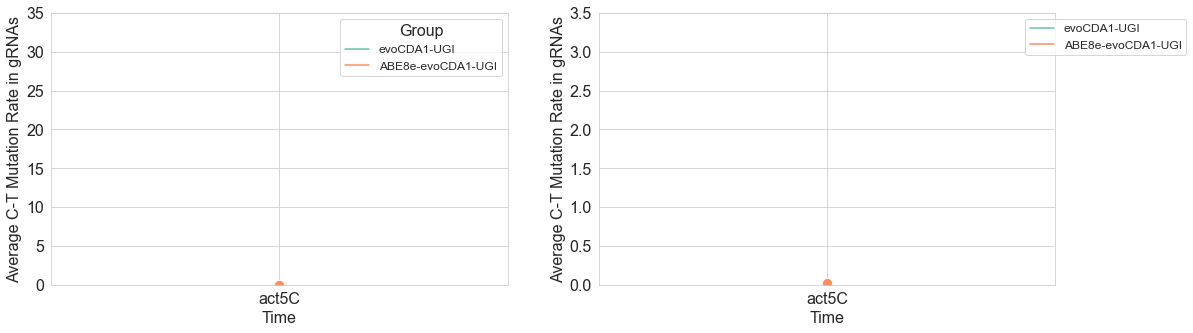

In [24]:
sns.set_style("whitegrid")

#DF['MutRate'].plot(kind = 'line', group = DF['Time'])
cfig,ax = plt.subplots(1, 2,figsize=(18, 5))
# DF = DF[4:12]
#DF['Time'] = DF['Time'].astype(float)
#DF['Time'] = DF['Time'].astype(str)
DF = DF.drop(DF[DF.Group == 'control'].index)
DF = DF.drop(DF[DF.Group == 'ctr'].index)
DF = DF.drop(DF[DF.Group == 'ctr-bad'].index)
DF = DF.drop(DF[DF.Group == 'evolvR'].index)
DF = DF.drop(DF[DF.Group == 'NLS-evolvR'].index)
DF = DF.drop(DF[DF.Group == 'evolvR-NLS'].index)
plot=sns.lineplot(ax = ax[0], data = DF, y ='Average C-T Mutation Rate in gRNAs', x = 'Time', hue = 'Group', marker = "o", markersize = 10,palette="Set2")
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plot.set(ylim = (0,35))
plot=sns.lineplot(ax = ax[1], data = DF, y ='Average C-T Mutation Rate in gRNAs', x = 'Time', hue = 'Group', marker = "o", markersize = 10,palette="Set2")
#plot=sns.scatter(ax = ax[1], data = DF, y ='Average C-T Mutation Rate in gRNAs', x = 'Time', hue = 'Group', marker = "o", markersize = 10,palette="Set2")
plt.legend(bbox_to_anchor=(1.3, 1.0),loc='upper right')
plot.set(ylim = (0,3.5))
cfig.savefig(DirOut+"comp_mut.pdf",dpi=300)


In [ ]:
#         plt.rcParams.update({'font.size': 14})
#         gRNAsbooFWD = np.where(REFgRNAsFWD==1)
#         gRNAsbooREV = np.where(REFgRNAsREV==1)
#         gRNAsbooCuts = np.where(REFgRNAsCutSites==1)

#         f, ax = plt.subplots(figsize = (12,5))
#         Threshold = 60
#         Size = 50
#         DFMutationsEach = pd.DataFrame(MismatchesEach, columns = ['AC','AT','AG','CA','CT','CG','TA','TC','TG','GA','GC','GT'])
#         #DataFrame.columns = 
#         DFMutationsEach.plot(ax = ax, kind='bar', stacked=True, linewidth = 0, width = 0.8, color = sns.color_palette("Spectral",12))
#         ax.set(title = Group+" "+Time+'   '+str(round(AvMut))+'% average C/G-T/A mismatches in gRNAs',ylim = [-7.5,Threshold],xlabel = 'position (bp)', ylabel = '% mismatch')
#         ax.title.set_size(14)
#         plt.legend(bbox_to_anchor=(1.1, 1.0),loc='upper right', fontsize = 14)
#         #ax.set_yticks(range(0,Threshold+1,20))
# #         ax.set_xticklabels([50,100,150],rotation = 0)
#         plt.xticks(ticks=[50,100,150], labels=[50,100,150],rotation = 0)
#         ax.grid(False)
#         ax.scatter(gRNAsbooFWD[0],[-5]*len(gRNAsbooFWD[0]), marker='4', cmap='summer', c = 'gray', s=Size, alpha = 0.5)
#         ax.scatter(gRNAsbooREV[0],[-6.5]*len(gRNAsbooREV[0]), marker='3', cmap='summer', c = 'gray', s=Size, alpha = 0.5)
# #         ax.scatter(gRNAsbooCuts[0]-0.5,[-7]*len(gRNAsbooCuts[0]), marker='|', cmap='summer', c = 'red', s=Size, alpha = 1)
#         ax.scatter(isMutable,[-2.5]*len(isMutable), marker='.', cmap='summer', c = 'red', s=10, alpha = 1)
#         ax.spines[['right', 'top']].set_visible(False)
#         f.tight_layout()
#         # f.savefig(DirOut+"allcombined_mismatched_samples_barplot_"+Samples[Exp]+'_'+str(len(FilesIn))+"-"+str(len(Files))+"files.png",dpi=300)
#         f.savefig("files.pdf",dpi=300)

